# Content
I. Introduction

II. Data description

III. Environment setup

IV. Data preprocessing
  1. Data loading
  2. Data combining
  3. Feature selecting 
  4. Handling missing values

V. Exploratory Data Analysis



# I. Introduction

The assessment of creditworthiness is a crucial task for banks and other financial institutions when granting loans. With the advancements in technology, machine learning methods have been utilized to evaluate credit scores, enabling financial institutions to make more accurate lending decisions. In this project, we investigated the performance of several machine learning algorithms to assess the credit scores of bank customers using a dataset collected from Ayeyarwady Bank in Myanmar in 2021. The bank was founded in 2010 by Zaw Zaw and the dataset comprises two sets of data: customer information and loan information. By analyzing these datasets, we aim to create a model that can accurately predict the creditworthiness of a customer, enabling the bank to make better-informed lending decisions. Our project has significant implications for the banking industry, as it can enhance the efficiency of credit evaluation processes and reduce the risk of bad debt.


# II. Data description

* CUSTOMERID: id of customer, get from loan information

* AGE: age of customer, calculated as the current year minus the date of birth(CURRENT_YEAR - DOB), get from customer information

* MARTIAL_STATUS: marital status of customer, get from customer information

* ACCOUNT_STATUS: account status of customer, get from customer information

* CRD_PURPOSE: customer's loan purpose, get from loan information

* CATNAME: types of customer loans

* ORIGINAL_AMT: amount borrowed by the customer, get from loan information

* MONTH_CREDIT: income of customer, get from loan information

* MONTH_DEBIT: expense of customer, get from loan information

* TIMES: number of payment periods of customers, get from loan information

* OPNDT: loan account opening date, get from loan information

* LAST_REPAYMENT_DATE: the last day to pay the loan

* LAST_REPAYMENT_AMOUNT: the last amount to pay the loan

* NPL_DAYS ( A nonperforming loan days ): the number of days customers have bad debt from the time of last payment
* MIN_NPL_DAYS: the number of days the customer has bad debt from the contract expiration date
* ....

# III. Environment Setup



In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from datetime import datetime
from datetime import date
from datetime import timezone
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from collections import Counter


# IV. Data preprocessing

## 1. Data loading

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive/')

#Read data from drive
pd.options.display.max_columns = None 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
os.chdir('/content/drive/MyDrive/Credit_Scoring/Final /')
cus_info = pd.read_csv("Data/Customer_Info.csv")
loan_info = pd.read_csv("Data/Loan_information.csv")
trans_info = pd.read_csv("Data/Customer_account_transaction_history.csv")

Mounted at /content/drive/


In [3]:
#Show all column of datasets
cus_info.head(2)

,CUSTOMER_ID,FULL_NAME,DOB,ONBOARDING_BRANCH_ID,ONBOARDING_BRANCH_NAME,NRC,FATHER_NAME,ADDRESS,ONBOARDING_TIME,ACCOUNT_STATUS,MARTIAL_STATUS
0,21249,ZEYAR NYUNT,5/28/1974,2,Ygn(41)_Novotel,12/BHATAHTA(N)000656,U NYUNT WIN MAUNG,"NO.(43/1),INYA MYAING ST,GOLDEN VALLEY (2),BAH...",6/30/2015,Close,Unknown
1,21258,KHIN MAUNG OO,8/7/1961,2,Ygn (1) Hlaing,KMYT002089,U THAUNG LWIN,- - SANCHAUNG YANGON(WEST) YANGON,1/16/2012,Close,Unknown


In [8]:
cus_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115848 entries, 0 to 115847
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CUSTOMER_ID             115848 non-null  int64 
 1   FULL_NAME               115848 non-null  object
 2   DOB                     112793 non-null  object
 3   ONBOARDING_BRANCH_ID    115848 non-null  int64 
 4   ONBOARDING_BRANCH_NAME  115848 non-null  object
 5   NRC                     115848 non-null  object
 6   FATHER_NAME             115072 non-null  object
 7   ADDRESS                 115689 non-null  object
 8   ONBOARDING_TIME         115848 non-null  object
 9   ACCOUNT_STATUS          115848 non-null  object
 10  MARTIAL_STATUS          115848 non-null  object
dtypes: int64(2), object(9)
memory usage: 9.7+ MB


In [9]:
#Show all column of datasets
loan_info.head(2)

,Debit ACNO,CREDIT_ACNO,CUSTOMERID,CUSTOMER_TYPE,CATEGORYID,CATNAME,CRD_PURPOSE,CRD_CLASSIFICATION,CRLIMIT,DISBURSEMENT_AMT,NORMAL_PRINCIPAL_AMT,PRINCIPAL_AMT,FIRSTDATE_OF_PRINCIPAL_PAYMENT,PRINCIPAL_PAY_DAY,DUE_AMT_OF_PRINCIPAL,INTEREST_PAID,INTEREST_PREPAID,INTEREST_RECEIVABLE,INTEREST_DUE,FIRSTDATE_OF_INTEREST_PAYMENT,FIRSTDAY_OF_INTEREST_PAYMENT,TOTAL_PAID,OUTSTD,BRNAME,ASDATE,NRC_NO,PHONE,DEALER_NAME,ADDRESS,NPL_DAYS,MIN_NPL_DAYS,MIN_DUEDT,LAST_REPAYMENT_DATE,LAST_REPAYMENT_AMOUNT,NPL_STATUS,PRINTAMT,INTEREST,PI,TIMES,FEE_OUTSTANDING,OPNDT,CLSDT,ORIGINAL_AMT,Down_payment%,Down payment amount,END_OF_TENOR,WEEK_DEBIT,WEEK_CREDIT,MONTH_DEBIT,MONTH_CREDIT,QUATER_DEBIT,QUATER_CREDIT,SEMI_ANNUAL_DEBIT,SEMI_ANNUAL_CREDIT,YEAR_DEBIT,YEAR_CREDIT
0,1121010022746.000,1801010612245,1256754,Single Customer,1067,Hire Purchase (Upfront Method) Int 7%,Electronic Equipments,Agriculture/Livestocks,413700,413700,"137840,13","275859,87",3/9/2018,9,"137840,13",28959,28959,28959,0,3/9/2018,9,275800,137900,0001-Nay Pyi Taw,12/05/2021,05/KATHANA(N)109230,09-262284012,Wellcom Mobile,"11QTR,KATHAR TSP,SAGING,09-262284012",914,915,09/11/2018,11/9/2018 11:56 CH,"59,87",Bad Debt,"137840,13",0,"137840,13",4,"118171,95",09/02/2018,NaN,591000,30,177300,09/02/2019,413700,"275859,87",413700,"275859,87",413700,"275859,87",413700,"275859,87",413700,"275859,87"
1,1121010022759.000,1801010612261,1617517,Single Customer,1067,Hire Purchase (Upfront Method) Int 7%,Electronic Equipments,Agriculture/Livestocks,595000,595000,"198289,8","396710,2",3/9/2018,9,"198289,8",41650,41650,41650,0,3/9/2018,9,"396666,64","198333,36",0001-Nay Pyi Taw,12/05/2021,13/KATANA(N)125765,09-449893223,Wellcom Mobile,"NWETNAW QTR, QTR-5, KYINE TONE TSP,09-449893223",914,915,09/11/2018,11/9/2018 11:56 CH,"43,56",Bad Debt,"198289,8",0,"198289,8",4,"169997,55",09/02/2018,NaN,850000,30,255000,09/02/2019,595000,"396710,2",595000,"396710,2",595000,"396710,2",595000,"396710,2",595000,"396710,2"


In [10]:
loan_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Debit ACNO                      14945 non-null  float64
 1   CREDIT_ACNO                     15005 non-null  int64  
 2   CUSTOMERID                      15005 non-null  int64  
 3   CUSTOMER_TYPE                   15005 non-null  object 
 4   CATEGORYID                      15005 non-null  int64  
 5   CATNAME                         15005 non-null  object 
 6   CRD_PURPOSE                     15005 non-null  object 
 7   CRD_CLASSIFICATION              15005 non-null  object 
 8   CRLIMIT                         15005 non-null  object 
 9   DISBURSEMENT_AMT                15005 non-null  object 
 10  NORMAL_PRINCIPAL_AMT            15005 non-null  object 
 11  PRINCIPAL_AMT                   15005 non-null  object 
 12  FIRSTDATE_OF_PRINCIPAL_PAYMENT  

In [11]:
#Show all column of datasets
trans_info.head(2)

,CUSTOMERID,TXDT,DEBIT_ACCOUNT_ID,CREDIT_ACCOUNT_ID,BALANCE,CURRENCY_CODE,DESCRIPTION
0,865172,5/4/2020 7:53 SA,NaN,112708010754947,0,MMK,Repayment interest: From 0112330010002663 to: ...
1,171703,5/4/2020 9:49 SA,NaN,136702010817033,0,MMK,payment for


In [12]:
trans_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323717 entries, 0 to 323716
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CUSTOMERID         323717 non-null  int64  
 1   TXDT               323717 non-null  object 
 2   DEBIT_ACCOUNT_ID   195536 non-null  float64
 3   CREDIT_ACCOUNT_ID  323717 non-null  int64  
 4   BALANCE            323717 non-null  object 
 5   CURRENCY_CODE      323717 non-null  object 
 6   DESCRIPTION        323709 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 17.3+ MB


## 2. Feature engineering

The number of previous accounts status of each customer

In [14]:
cus_info

,CUSTOMER_ID,FULL_NAME,DOB,ONBOARDING_BRANCH_ID,ONBOARDING_BRANCH_NAME,NRC,FATHER_NAME,ADDRESS,ONBOARDING_TIME,ACCOUNT_STATUS,MARTIAL_STATUS
0,21249,ZEYAR NYUNT,5/28/1974,2,Ygn(41)_Novotel,12/BHATAHTA(N)000656,U NYUNT WIN MAUNG,"NO.(43/1),INYA MYAING ST,GOLDEN VALLEY (2),BAH...",6/30/2015,Close,Unknown
1,21258,KHIN MAUNG OO,8/7/1961,2,Ygn (1) Hlaing,KMYT002089,U THAUNG LWIN,- - SANCHAUNG YANGON(WEST) YANGON,1/16/2012,Close,Unknown
2,21434,SANJIV KUMAR,10/11/1966,2,Ygn(26)_KTD,12/KATATA(N)007899,U RAM ASRAY,"NO.43(B), 31ST,GROUND FLOOR, PABEDAN YANGON(W...",9/14/2017,Normal,Unknown
3,21438,WIN MIN THANT,2/15/1984,2,Mdy (9) 26 x 80 St,09/MAKHANA(N)182581,U THANT ZIN,ZA WA WA(205);HTAN TAPIN QTR;AHMARAPURA TSP;MD...,8/27/2020,Normal,Unknown
4,21441,MARLAR WIN,10/16/1975,2,Ygn(41)_Novotel,12/THAHGAKA(N)042538,U HLA WIN,"NO(65)B(1), MINDAMA HOUSING, MINDAMA ST, MAYAN...",6/5/2015,Close,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
115843,2869441,SU SU HTWE,1/1/1969,3,Mdy (1) 26 Street,09/MARAMA(N)020324,U THAUNG HTWE,26ST 72-73 BET/9592002963,2/5/2021,Normal,Unknown
115844,2848807,NAY WIN SOE,5/30/1987,40,Mdy (4) 19 Street,09/AHMAZA(N)022681,U AUNG KYAW KYAW,BET(37x38)(67x68)MDY;09798857465,1/22/2021,Normal,Unknown
115845,2846426,SAN SAN OO,3/6/1978,209,TBG,14/THAPANA(N)073732,U OHN THWIN,"MI CHAUNG KITE VILLAGE, THAPAUNG TSP;09-778070394",1/8/2021,Normal,Unknown
115846,2822961,ZIN PHYO OO,1/11/1994,48,Ygn (12) Shwe Gone Dine,12/KHARANA(N)129833,U TUN TIN,"NO(18),STAFF HOUSING,THANLYIN TSP,YGN./09-4550...",12/24/2020,Normal,Unknown


In [15]:
# Count the number of account statuses of each customer

nopen = cus_info.groupby('CUSTOMER_ID',as_index=False)['ACCOUNT_STATUS'].apply(lambda x: (x=='Normal').sum())
nclose = cus_info.groupby('CUSTOMER_ID',as_index=False)['ACCOUNT_STATUS'].apply(lambda x: (x=='Close').sum())
nsuspense = cus_info.groupby('CUSTOMER_ID',as_index=False)['ACCOUNT_STATUS'].apply(lambda x: (x=='Suspense').sum())

nopen.rename(columns={'ACCOUNT_STATUS':'nopen_account'}, inplace=True)
nclose.rename(columns={'ACCOUNT_STATUS':'nclose_account'}, inplace=True)
nsuspense.rename(columns={'ACCOUNT_STATUS':'nsuspense_account'}, inplace=True)


In [17]:
df_temp = pd.merge(nopen, nclose, on=['CUSTOMER_ID'], how='outer')
df_acc_status = pd.merge(df_temp, nsuspense, on=['CUSTOMER_ID'], how='outer')
cus_info = pd.merge(cus_info, df_acc_status, on=['CUSTOMER_ID'], how='outer')

In [19]:
# Filter only retrieve transactions of customers with information on the loan information table

cus_trans_id = trans_info.CUSTOMERID.unique()
cus_loan_id = loan_info.CUSTOMERID.unique()

cus_trans_in_loan = []
for i in cus_trans_id:
  if i in cus_loan_id:
    cus_trans_in_loan.append(i)
len(cus_trans_in_loan)

14114

In [20]:
# Save filtered transaction histories
trans_filter_cus = trans_info[trans_info['CUSTOMERID'].isin(cus_trans_in_loan)]

trans_filter_cus.to_csv("Data/his_trans_filter.csv",index=False)

len(trans_filter_cus)

113397

The number of transactions in the last 12 months

* TXDT is a data field in a data set that stores customer transaction history information. It shows the date of the transaction.

In [21]:
# Reformat date of the transaction
trans_filter_cus['TXDT'] = pd.to_datetime(trans_filter_cus['TXDT']).dt.strftime('%Y-%m')

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname SA identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CH identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
<ipython-input-21-1fa091139c78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [22]:
# Calculate the number of transactions in the last 12 months of each customer

ntransaction_l12m = pd.DataFrame(trans_filter_cus.CUSTOMERID.value_counts())
ntransaction_l12m.rename(columns={'CUSTOMERID':'ntransaction_l12m'}, inplace=True)
ntransaction_l12m['CUSTOMERID'] = ntransaction_l12m.index
ntransaction_l12m = ntransaction_l12m.reset_index(drop=True)

loan_info = pd.merge(loan_info, ntransaction_l12m, on=['CUSTOMERID'], how='outer')

In [23]:
# Re-explore the df
cus_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115848 entries, 0 to 115847
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CUSTOMER_ID             115848 non-null  int64 
 1   FULL_NAME               115848 non-null  object
 2   DOB                     112793 non-null  object
 3   ONBOARDING_BRANCH_ID    115848 non-null  int64 
 4   ONBOARDING_BRANCH_NAME  115848 non-null  object
 5   NRC                     115848 non-null  object
 6   FATHER_NAME             115072 non-null  object
 7   ADDRESS                 115689 non-null  object
 8   ONBOARDING_TIME         115848 non-null  object
 9   ACCOUNT_STATUS          115848 non-null  object
 10  MARTIAL_STATUS          115848 non-null  object
 11  nopen_account           115848 non-null  int64 
 12  nclose_account          115848 non-null  int64 
 13  nsuspense_account       115848 non-null  int64 
dtypes: int64(5), object(9)
memory usage:

*  The data set contains 115847 customers and 14 customer attributes. 

---


*  The data set of customer information has some fields with missing values such as: DOB, FATHER_NAME and ADDRESS Especially, the field of birth date is missing about 3000 customers.

Combine two data sets of customer information and loan information into one for easy integration

In [25]:
#Combine dataset
loan = pd.merge(loan_info, cus_info[['CUSTOMER_ID','MARTIAL_STATUS', 'DOB', 'nopen_account', 'nclose_account', 'nsuspense_account']], left_on='CUSTOMERID', right_on='CUSTOMER_ID', how='outer')

In [26]:
#Merging the two data sets by customer ID
loan = loan[loan['CUSTOMERID'] == loan['CUSTOMER_ID']]

In [27]:
original_len = loan.shape[0]
original_len

23325

In [28]:
#Delete duplicate lines in the data set
loan = loan.drop_duplicates(keep='last')

print("Amount of data without removing duplicates: ", original_len)
print("Amount of data after removing duplicates: ", loan.shape[0])

Amount of data without removing duplicates:  23325
Amount of data after removing duplicates:  14625


In [29]:
loan.nopen_account.value_counts()

1.000     13952
2.000       410
0.000        89
3.000        66
21.000       21
5.000        20
4.000        20
6.000        18
12.000       12
10.000       10
7.000         7
Name: nopen_account, dtype: int64

In [30]:
loan[loan['nopen_account'] == 0][['nopen_account','nclose_account']]

,nopen_account,nclose_account
30,0.000,4.000
289,0.000,1.000
1062,0.000,1.000
1309,0.000,1.000
1765,0.000,4.000
...,...,...
20764,0.000,1.000
20779,0.000,2.000
21464,0.000,1.000
21467,0.000,1.000


Because customers who do not have a current loan open have loan information. So these 89 cases can be considered as outlier cases, so we decided to remove these cases from the data set.

In [80]:
loan = loan.drop(loan[loan['nopen_account'] == 0].index)

In [33]:
# Change type from object to float
loan[['CRLIMIT',
       'DISBURSEMENT_AMT', 'NORMAL_PRINCIPAL_AMT', 'PRINCIPAL_AMT', 'PRINCIPAL_PAY_DAY',
       'DUE_AMT_OF_PRINCIPAL', 'INTEREST_PAID', 'INTEREST_PREPAID',
       'INTEREST_RECEIVABLE', 'INTEREST_DUE','TOTAL_PAID', 'OUTSTD','LAST_REPAYMENT_AMOUNT',
      'PRINTAMT', 'INTEREST', 'PI', 'TIMES', 'FEE_OUTSTANDING','ORIGINAL_AMT', 'Down_payment%', 'Down payment amount',
      'WEEK_DEBIT', 'WEEK_CREDIT', 'MONTH_DEBIT',
       'MONTH_CREDIT', 'QUATER_DEBIT', 'QUATER_CREDIT', 'SEMI_ANNUAL_DEBIT',
       'SEMI_ANNUAL_CREDIT', 'YEAR_DEBIT', 'YEAR_CREDIT']] = loan[['CRLIMIT',
       'DISBURSEMENT_AMT', 'NORMAL_PRINCIPAL_AMT', 'PRINCIPAL_AMT', 'PRINCIPAL_PAY_DAY',
       'DUE_AMT_OF_PRINCIPAL', 'INTEREST_PAID', 'INTEREST_PREPAID',
       'INTEREST_RECEIVABLE', 'INTEREST_DUE','TOTAL_PAID', 'OUTSTD','LAST_REPAYMENT_AMOUNT',
      'PRINTAMT', 'INTEREST', 'PI', 'TIMES', 'FEE_OUTSTANDING','ORIGINAL_AMT', 'Down_payment%', 'Down payment amount',
      'WEEK_DEBIT', 'WEEK_CREDIT', 'MONTH_DEBIT',
       'MONTH_CREDIT', 'QUATER_DEBIT', 'QUATER_CREDIT', 'SEMI_ANNUAL_DEBIT',
       'SEMI_ANNUAL_CREDIT', 'YEAR_DEBIT', 'YEAR_CREDIT']].replace(",", ".",regex=True).astype(float)

### Create State

The dataset has information about the specific address of each customer, but because all of this information does not have the same format, it is difficult for the machine learning model to identify the specific address of each customer. client. Therefore, the customer's State address information will be obtained from the NRC\_NO field about National Registration Card in Myanmar with the codes for each state as follows: 1/ Kachin, 2/ Kayah, 3/ Kayin, 4/ Chin, 5/ Sagaing, 6/ Tanintharyi, 7/ Bago, 8/ Magway, 9/ Mandalay, 10/ Mon, 11/ Rakhine, 12/ Yangon, 13/ Shan and 14/ Ayeyarwaddy.

In [34]:
### state of customer
### 1/ Kachin, 2/ Kayah, 3/ Kayin, 4/ Chin, 5/ Sagaing, 6/ Tanintharyi, 7/ Bago, 8/ Magway, 
### 9/ Mandalay, 10/ Mon, 11/ Rakhine, 12/ Yangon, 13/ Shan and 14/ Ayeyarwaddy
import re
regex = r'^(\d{1,2})/([A-Z-]+)\((?:[A-Z])\)([-\d]+)$'
def get_state(string):
  match = re.match(regex, string)
  if match:
      groups = match.groups()
      return int(groups[0])
      print("State:", groups[0])
      print("Dis:", groups[1])
      print("Code:", groups[2])
  else:
      return 0

In [35]:
loan['state'] = loan.NRC_NO.apply(get_state)

In [36]:
loan['state'].value_counts()[:60]

12    5073
9     2899
14    1067
5      906
13     864
7      846
10     757
8      715
0      593
1      232
6      185
11     164
2      133
3       79
4       23
Name: state, dtype: int64

### Create Age

I changed the date of birth field to age form to easily show the age distribution of the customers. Because the data is collected from 2021, the customer's age will be 2021 minus the year of birth.

In [37]:
# Change dob to age
loan['DOB'] = pd.DatetimeIndex(loan['DOB']).year
loan['Age'] = 2021 - loan['DOB']
loan.drop(['DOB',], axis=1, inplace=True)

Next, I converted the target variable from 5 labels to 2 types, Good and Bad. With Good corresponds to a label of 1 and Bad with a label of 0. 
* Labels ('Bad Debt', 'Doubtful', 'Watch') is Bad (0)
* Labels ('Standard', 'Sub-standard') is Good (1)

In [38]:
# Create a new column based on the NPL_STATUS column that will be our target variable
loan['good_bad'] = np.where(loan.loc[:, 'NPL_STATUS'].isin(['Bad Debt', 'Doubtful', 'Watch']), 0, 1)
# Drop the original 'NPL_STATUS' column
loan.drop(columns = ['NPL_STATUS'], inplace = True)

### Create Loan duration

In the dataset, there is information about the loan opening date and the loan closing term. Since these two fields are in date, month, and year format, it is difficult for the machine learning model to process and learn information from these two fields. So by combining these two fields to create a loan maturity field. Since the loan maturity field will be in months, the value will be a simple integer that makes it easier for the model to learn how to correlate the loan period and the predicted outcome. In addition, it can help assess a borrower's default risk on a loan. Longer loan terms mean more time for borrowers to experience financial hardship, which can lead to default.

In [39]:
# Reformat data columns as date from object to datetime

loan['END_OF_TENOR'] = pd.to_datetime(loan['END_OF_TENOR'], format="%d/%m/%Y")
loan['OPNDT'] = pd.to_datetime(loan['OPNDT'], format="%d/%m/%Y")

loan['Duration'] = (loan['END_OF_TENOR'] - loan['OPNDT']) /np.timedelta64(1, 'M')

loan['Duration'] = loan['Duration'].round()

## 3. Feature selecting

In [40]:
loan['ASDATE'].unique()

array(['12/05/2021'], dtype=object)



*   Drop CUSTOMER_ID, CREDIT_ACNO, Debit ACNO, PHONE, CLSDT, NRC_NO columns. This columns do not have any advantage for predict because they do not contain any information about the target variable. This columns are simply a unique identifier for each row in the dataset.
*   Drop CLSDT column because this column is missing all value
*   Drop END_OF_TENOR, OPNDT because in the dataset there is already a field Duration representing the loan term in units of months, this field will be highly correlated with the two fields of the last payment date and the loan opening date.
* Drop ASDATE because this is the date of data collection, all rows have the same value
* Drop the Down payment amount as it is highly correlated with the similar Down payment% field
* Drop Address because the feature engineering part of the address has been separated by state from NRC No
* Drop LAST_REPAYMENT_DATE, LAST_REPAYMENT_AMOUNT, FEE_OUTSTANDING, MIN_NPL_DAYS, INTEREST_PREPAID, TIMES, INTEREST_PAID, TOTAL_PAID,OUTSTD ..... Because these fields are actually, if we consider a new loan, the information about these fields will not be available. . It's information about old loans that happened so these fields can be data leak information. For example, if a loan is a bad debt, then there is information about the number of times of bad debt (TIMES).


In [41]:
loan.drop(['CUSTOMER_ID','CREDIT_ACNO','Debit ACNO','PHONE','CLSDT',
           'NRC_NO','LAST_REPAYMENT_DATE', 'LAST_REPAYMENT_AMOUNT','FEE_OUTSTANDING',
           'MIN_NPL_DAYS','FIRSTDATE_OF_PRINCIPAL_PAYMENT','FIRSTDATE_OF_INTEREST_PAYMENT',
           'MIN_DUEDT','ASDATE', 'NPL_DAYS','Down payment amount', 'PRINCIPAL_PAY_DAY',
       'DUE_AMT_OF_PRINCIPAL', 'INTEREST_PREPAID', 'TIMES','END_OF_TENOR','OPNDT' ,'ADDRESS'
       ,'FIRSTDAY_OF_INTEREST_PAYMENT','INTEREST_DUE','PRINCIPAL_AMT', 'INTEREST_PAID', 'TOTAL_PAID',
       'WEEK_DEBIT','WEEK_CREDIT','MONTH_DEBIT', 'MONTH_CREDIT','YEAR_CREDIT','YEAR_DEBIT','SEMI_ANNUAL_CREDIT','SEMI_ANNUAL_DEBIT',
       'QUATER_DEBIT','QUATER_CREDIT','OUTSTD','NORMAL_PRINCIPAL_AMT','INTEREST_RECEIVABLE'], axis=1, inplace=True)

In [42]:
loan.columns

Index(['CUSTOMERID', 'CUSTOMER_TYPE', 'CATEGORYID', 'CATNAME', 'CRD_PURPOSE',
       'CRD_CLASSIFICATION', 'CRLIMIT', 'DISBURSEMENT_AMT', 'BRNAME',
       'DEALER_NAME', 'PRINTAMT', 'INTEREST', 'PI', 'ORIGINAL_AMT',
       'Down_payment%', 'ntransaction_l12m', 'MARTIAL_STATUS', 'nopen_account',
       'nclose_account', 'nsuspense_account', 'state', 'Age', 'good_bad',
       'Duration'],
      dtype='object')

<ipython-input-43-afe70aebf8ca>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = loan.corr()


<Axes: >

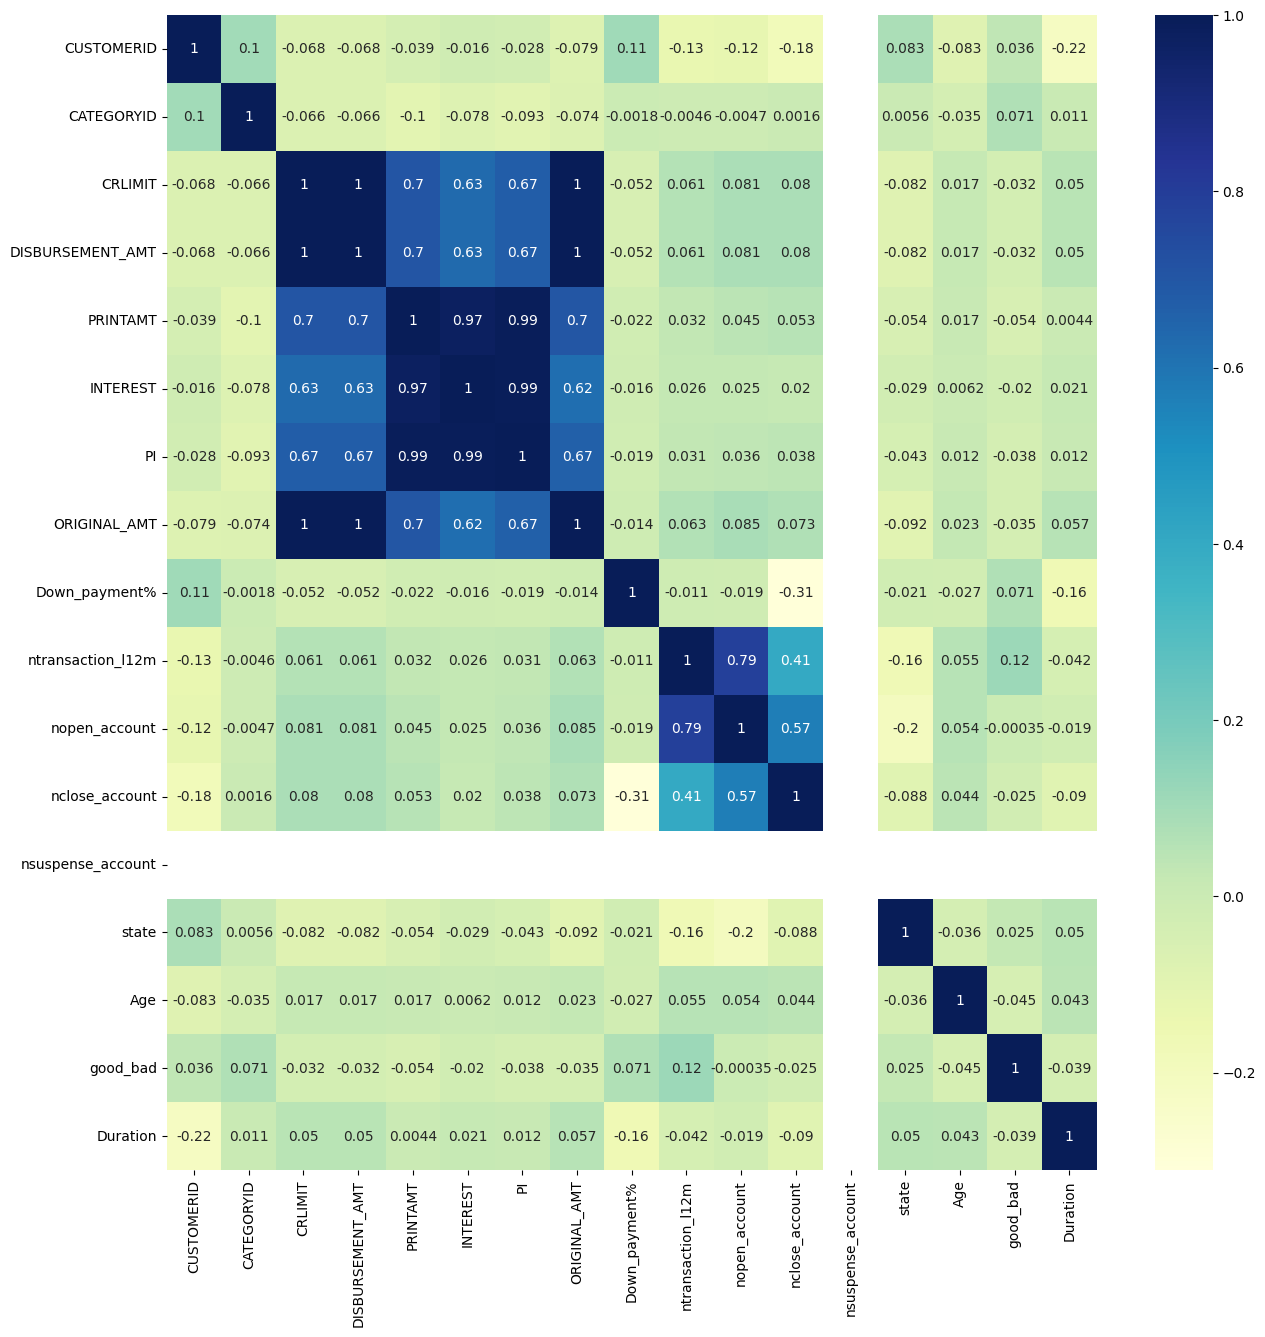

In [43]:
#Create correlation matrix 
plt.figure(figsize=(15,15))
corrMatrix = loan.corr()
sns.heatmap(corrMatrix, annot=True,cmap = 'YlGnBu')

We see that the correlation matrix has many fields that are highly correlated with each other. So we will eliminate these fields because their predictability is the same

In [44]:
# separate field types
numerical_features = loan.select_dtypes(include='number')
object_features = loan.select_dtypes(include='object')
datetime_features = loan.select_dtypes(include='datetime')

Remove fields with correlation greater than or equal to 0.95 and keep only one of them

In [45]:
# determine 
columns = np.full((corrMatrix.shape[0],), True, dtype=bool)
for i in range(corrMatrix.shape[0]):
    for j in range(i+1, corrMatrix.shape[0]):
        if corrMatrix.iloc[i,j] >= 0.95:
            print('Pair: ', corrMatrix.columns[i], '-----', corrMatrix.columns[j])
            if columns[j]:
                columns[j] = False
selected_columns = numerical_features.columns[columns]
# data = data[selected_columns]
columns

Pair:  CRLIMIT ----- DISBURSEMENT_AMT
Pair:  CRLIMIT ----- ORIGINAL_AMT
Pair:  DISBURSEMENT_AMT ----- ORIGINAL_AMT
Pair:  PRINTAMT ----- INTEREST
Pair:  PRINTAMT ----- PI
Pair:  INTEREST ----- PI


array([ True,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

Remove nsuspense_account because this column has only one value, it does not contribute to the prediction

In [46]:
loan.drop(['nsuspense_account'], axis =1, inplace=True)

In [47]:
unselect = numerical_features.columns.difference(selected_columns)
#drop mutilcorr
loan.drop(unselect, axis=1, inplace = True)

<ipython-input-48-ac677b379328>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = loan.corr()


<Axes: >

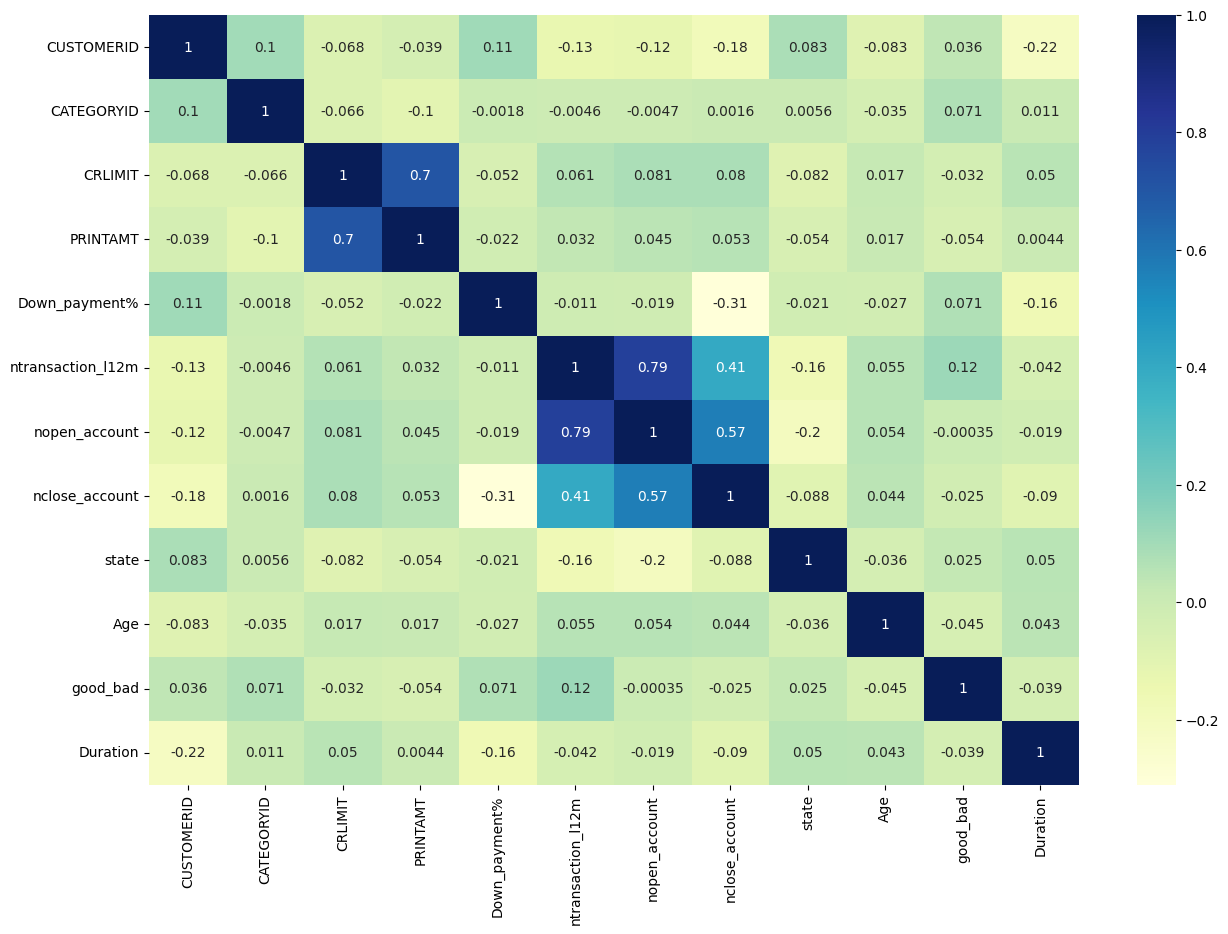

In [48]:
plt.figure(figsize=(15,10))
corrMatrix = loan.corr()
sns.heatmap(corrMatrix, annot=True, cmap = 'YlGnBu')

## 4. Handling missing values

In [49]:
loan.isna().sum()

CUSTOMERID              0
CUSTOMER_TYPE           0
CATEGORYID              0
CATNAME                 0
CRD_PURPOSE             0
CRD_CLASSIFICATION      0
CRLIMIT                 0
BRNAME                  0
DEALER_NAME             0
PRINTAMT                0
Down_payment%           0
ntransaction_l12m     628
MARTIAL_STATUS          0
nopen_account           0
nclose_account          0
state                   0
Age                   190
good_bad                0
Duration                0
dtype: int64

In [50]:
#Divide the data into two small sets of bad debt and good debt
bad_loans = loan[loan['good_bad'] == 0].copy()
good_loans = loan[loan['good_bad'] == 1].copy()

We see that the dataset has two fields with missing values, ntransaction_l12m and Age. We will choose the treatment method that fill empty values is the average of the values of that field.

In [51]:
#Fill in the mean value of age according to each classification class
mean_age_good = round(good_loans['Age'].mean(),0)
good_loans['Age'].fillna(value=mean_age_good, inplace=True)

mean_age_bad = round(bad_loans['Age'].mean(),0)
bad_loans['Age'].fillna(value=mean_age_bad, inplace=True)

loan = pd.concat([good_loans, bad_loans], axis = 0)

In [52]:
# Check missing values
loan.isna().sum()

# filling missing value in each group 
loan_0 = loan[loan['good_bad'] == 0]
loan_1 = loan[loan['good_bad'] == 1]

mean_good = round(loan_1['ntransaction_l12m'].mean(),0)
mean_bad = round(loan_0['ntransaction_l12m'].mean(),0)

loan_0['ntransaction_l12m'].fillna(value=mean_bad, inplace=True)
loan_1['ntransaction_l12m'].fillna(value=mean_good, inplace=True)

loan = pd.concat([loan_0, loan_1], axis = 0)

<ipython-input-52-5af4e7255845>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_0['ntransaction_l12m'].fillna(value=mean_bad, inplace=True)
<ipython-input-52-5af4e7255845>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_1['ntransaction_l12m'].fillna(value=mean_good, inplace=True)


# V. Exploratory Data Analysis (EDA)

###Summary Statistics

In [53]:
#Summary statistics of the numerical columns in the dataset
stats = loan.describe()
stats

,CUSTOMERID,CATEGORYID,CRLIMIT,PRINTAMT,Down_payment%,ntransaction_l12m,nopen_account,nclose_account,state,Age,good_bad,Duration
count,14536.000,14536.000,14536.000,14536.000,14536.000,14536.000,14536.000,14536.000,14536.000,14536.000,14536.000,14536.000
mean,1208345.754,1075.550,27367660.904,2858107.032,21.561,8.461,1.100,0.497,9.674,40.401,0.549,45.092
std,947366.556,48.066,150743299.188,42522346.892,16.241,9.629,0.923,1.330,3.460,11.388,0.498,20.007
min,5313.000,623.000,84000.000,0.000,0.000,1.000,1.000,0.000,0.000,7.000,0.000,0.000
25%,241323.750,1072.000,14460000.000,19726.463,0.000,5.000,1.000,0.000,8.000,33.000,0.000,34.000
50%,1006573.500,1083.000,19530000.000,846760.605,20.000,8.000,1.000,0.000,10.000,39.000,1.000,48.000
75%,2127880.750,1083.000,24418590.000,1942798.190,30.000,10.000,1.000,1.000,12.000,47.000,1.000,60.000
max,2888622.000,1269.000,12785850000.000,4919064009.000,85.000,454.000,21.000,31.000,14.000,122.000,1.000,180.000


In [54]:
def visualaize_percentage(columns):
  plt.figure(figsize= (25,25))
  df_g = loan.groupby([columns, 'good_bad']).size().reset_index()
  df_g['percentage'] = loan.groupby([columns, 'good_bad']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values

  df_g.columns = [columns, 'good_bad', 'count', '%']

  fig = px.bar(df_g, x=columns, y=['count'], color='good_bad', text=df_g['%'].apply(lambda x: '{0:1.2f}%'.format(x)),
        width=1000, height=500)
  fig.show(renderer="colab")

### 1. Target column (NPL_STATUS)

Text(0.5, 0, 'Label')

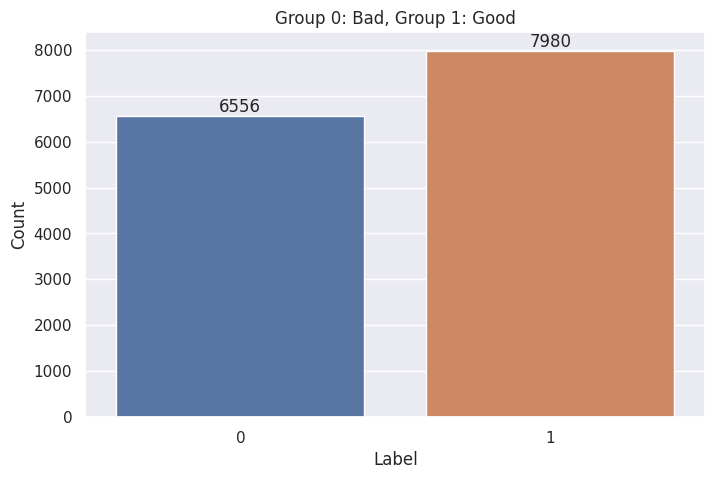

In [55]:
#Value counts of the columns - NPL_STATUS
target_count = loan['good_bad'].value_counts(dropna=False)
sns.set(rc = {'figure.figsize': (8, 5)})
ax= sns.barplot(x=target_count.index, y=target_count.values)
ax.bar_label(ax.containers[0])
plt.title('Group 0: Bad, Group 1: Good')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Label', fontsize = 12)

The NPL_STATUS variable is the target variable. It tells us whether the customer's trustworthiness is at standard, sub-standard, doubtful, watch or bad debt. In this data set, we see that the majority are trusted customers with about 8 thousand customers (Standard, Sub-Standard)

<Axes: ylabel='good_bad'>

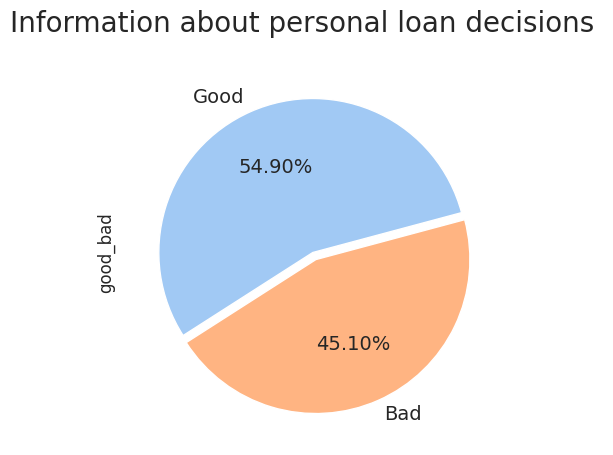

In [56]:
# Create chart 
f, ax = plt.subplots(figsize=(5,5))

colors = sns.color_palette('pastel')[0:5]

labels ='Good', 'Bad'

plt.suptitle('Information about personal loan decisions ', fontsize=20)

loan['good_bad'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.2f%%', ax=ax, colors=colors, 
                                             labels=labels, fontsize=14, startangle=15)


The data set now has a target variable of good_bad, in which the data has 45.10% bad debt customers and 54.90% good debt customers. There's not much difference between the two classes

### 2. Purpose of loan (CRD_PURPOSE)

Text(0.5, 0, 'CRD_PURPOSE')

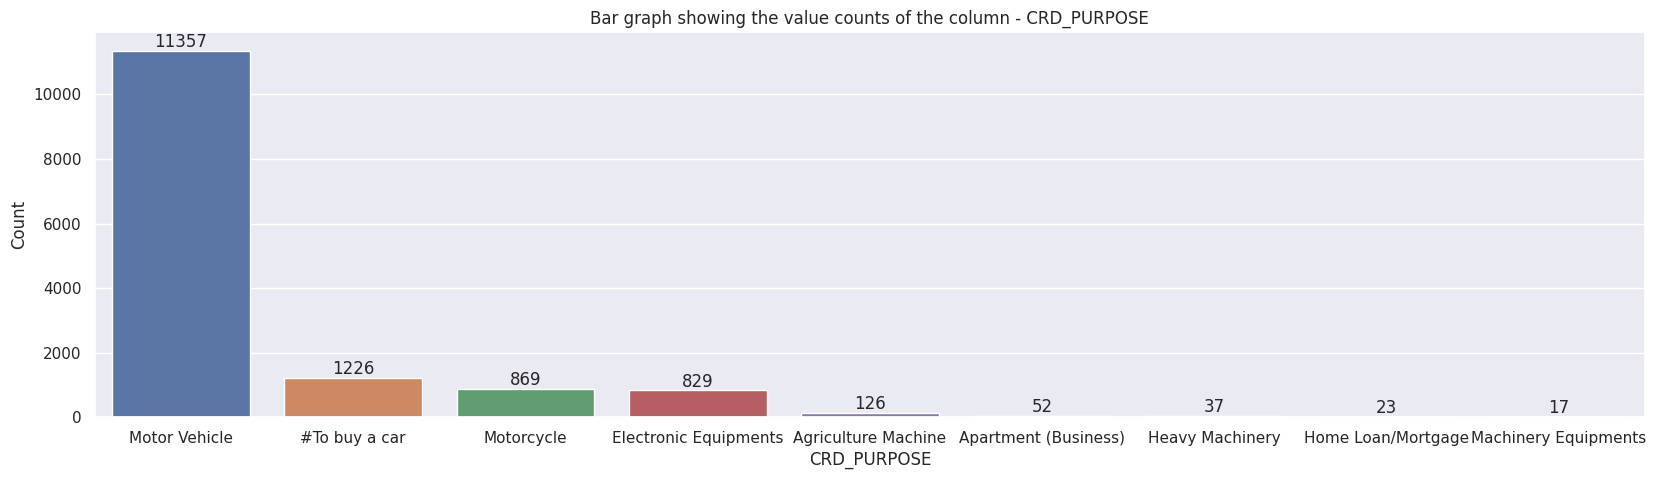

In [57]:
#Value counts of the columns - CRD_PURPOSE
purpose_count = loan['CRD_PURPOSE'].value_counts(dropna=False)
sns.set(rc = {'figure.figsize': (20, 5)})
ax= sns.barplot(x=purpose_count.index, y=purpose_count.values)
ax.bar_label(ax.containers[0])
plt.title('Bar graph showing the value counts of the column - CRD_PURPOSE')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('CRD_PURPOSE', fontsize = 12)

We see that the main purpose of the borrower is to buy a Motor Vehicle. The rest will have a few customers borrow money to buy cars, motorbikes or electronic equipments

In [58]:
visualaize_percentage('CRD_PURPOSE')

<ipython-input-54-492bd057162a>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_g['percentage'] = loan.groupby([columns, 'good_bad']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values


<Figure size 2500x2500 with 0 Axes>

The customer's loan target affects whether the customer has bad debt or not. For goals such as purchasing heavy machinery, machinery equipments and home loan/mortgage, the customer has a higher percentage of bad debt than the other sub-targets. But the number of customers who borrow to buy machinery is very small. In addition, there are more than 1,000 customers borrowing for the purpose of buying cars, and in this group, the bad debt status is only half that of the good debt group.

### 3. Types of loan

In [59]:
#Value counts of the columns - LOAN TYPES
catname_count = loan['CATNAME'].value_counts(dropna=False)
print(len(catname_count))
catname_count

28


Hire Purchase (Amortization) Int 10%                          12383
Hire Purchase (Upfront Method) Int 9%                          1627
Agriculture Machine HP (Upfront Method) 12 Month with 9%         89
Hire Purchase (Amortization) 60 Month with 10%                   80
Hire Purchase (Upfront Method) Int 16%                           70
Hire Purchase (Upfront Method) Int 7%                            63
Hire Purchase (Upfront Method) 24 Month with 11%                 53
Hire Purchase (Amortization) Int 8%                              51
Hire Purchase (Amortization) Int 9%                              23
Hire Purchase (Upfront Method) 12 Month with 7%                  14
Hire Purchase (Flexible Flat Method ) Int 8.5%                   14
Agriculture Machine HP (Upfront Method) 24 Month with 12%        12
Hire Purchase (Upfront Method) Int 11%                           10
HP (Car Loan) for AYA 10 year of service staff 5% interest        8
Hire Purchase (Amortization) 36 Month with 10%  

In the data set, there are 28 types of loans, in which the majority of data is Hire Purchase (Amortization) Int 10%, it accounts for 12383 out of a total of 14625 data. Ranked second is the Hire Purchase (Upfront Method) Int 9% form with a count of 1627

### 4. Types of customers (CUSTOMER_TYPE)

Text(0.5, 0, 'CUSTOMER_TYPE')

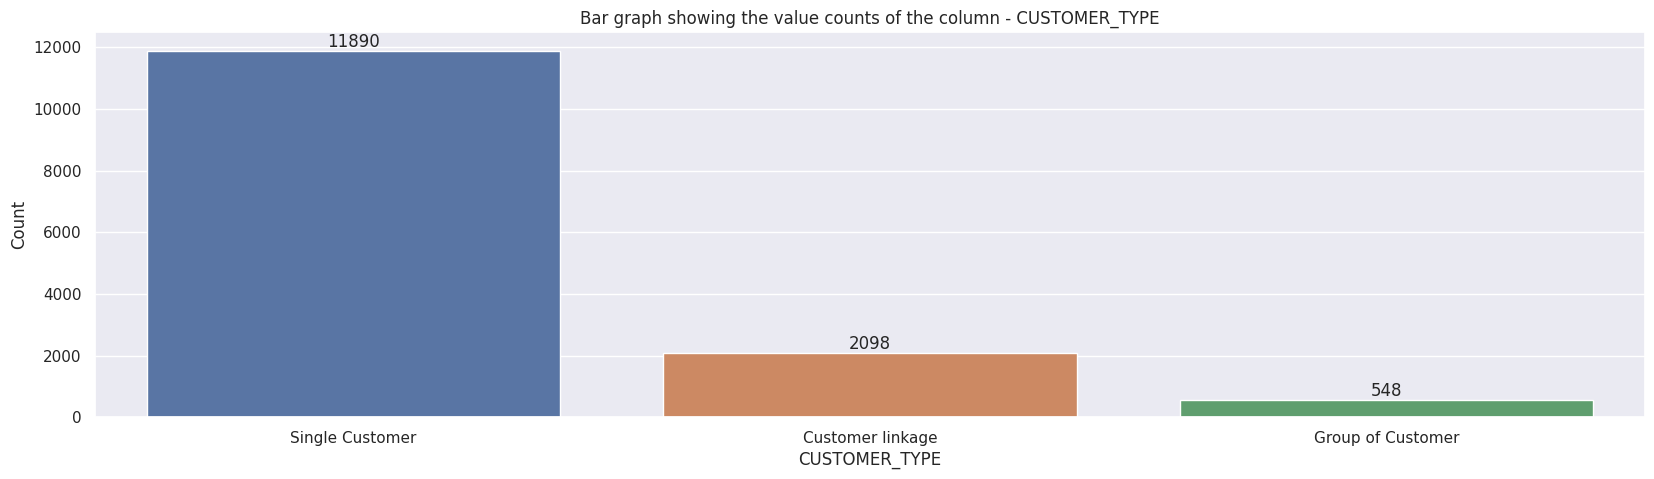

In [60]:
#Value counts of the columns - MARTIAL_STATUS
martial_count = loan['CUSTOMER_TYPE'].value_counts(dropna=False)
sns.set(rc = {'figure.figsize': (20, 5)})
ax= sns.barplot(x=martial_count.index, y=martial_count.values)
ax.bar_label(ax.containers[0])
plt.title('Bar graph showing the value counts of the column - CUSTOMER_TYPE')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('CUSTOMER_TYPE', fontsize = 12)

Customers who open loans are mainly Single Customers, it accounts for 80% of customers in the data set. The remaining two customer groups Customer Linkage and Group of Customer.

In [61]:
visualaize_percentage('CUSTOMER_TYPE')

<ipython-input-54-492bd057162a>:4: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



<Figure size 2500x2500 with 0 Axes>

In all three customer groups, the percentage of good debt customers is higher than the percentage of bad debt customers. But that number is quite small, approximately 5-8%.

### 5. Maritial status (MARITIAL_STATUS)

Text(0.5, 0, 'MARTIAL_STATUS')

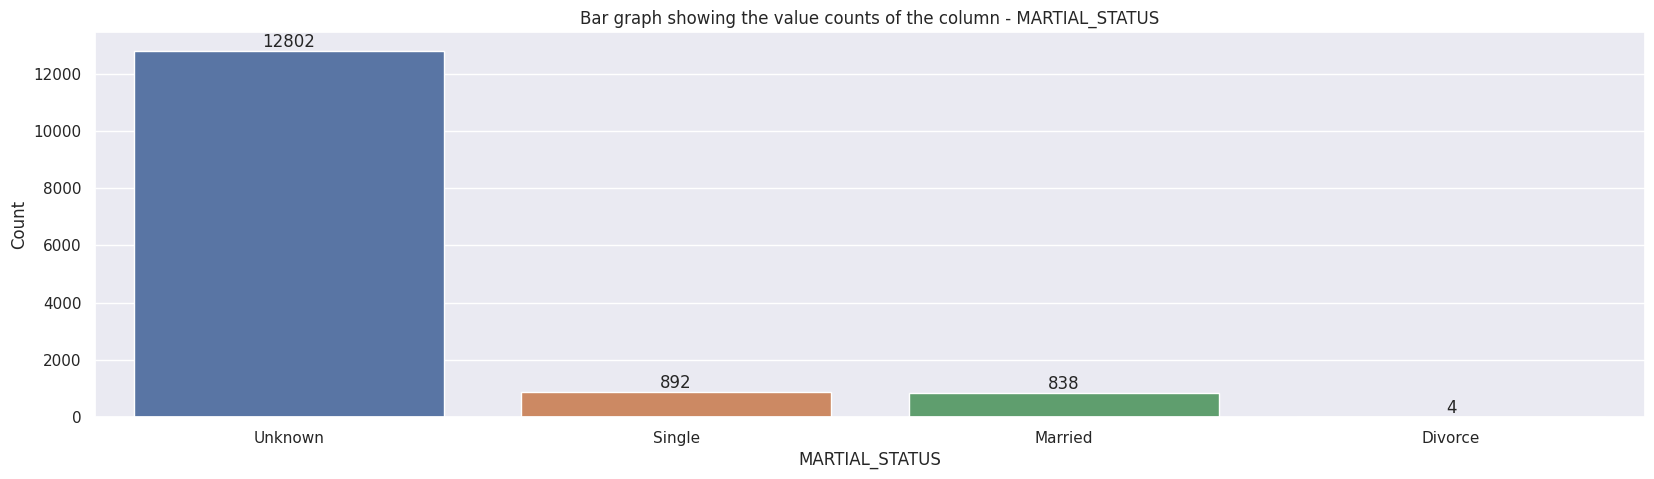

In [62]:
#Value counts of the columns - MARTIAL_STATUS
martial_count = loan['MARTIAL_STATUS'].value_counts(dropna=False)
sns.set(rc = {'figure.figsize': (20, 5)})
ax= sns.barplot(x=martial_count.index, y=martial_count.values)
ax.bar_label(ax.containers[0])
plt.title('Bar graph showing the value counts of the column - MARTIAL_STATUS')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('MARTIAL_STATUS', fontsize = 12)

Regarding the customer's marital status, there are many customers who do not have information about this issue. So we can think about keeping this field and treating Unknown as a data label

In [63]:
visualaize_percentage('MARTIAL_STATUS')

<ipython-input-54-492bd057162a>:4: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



<Figure size 2500x2500 with 0 Axes>

In all four customer groups, the percentage of good debt customers is higher than the percentage of bad debt customers. But that number is quite small, approximately 8%.

### 6. Age distribution

<ipython-input-64-d3dce7cc34ab>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Customer Age Distribution')

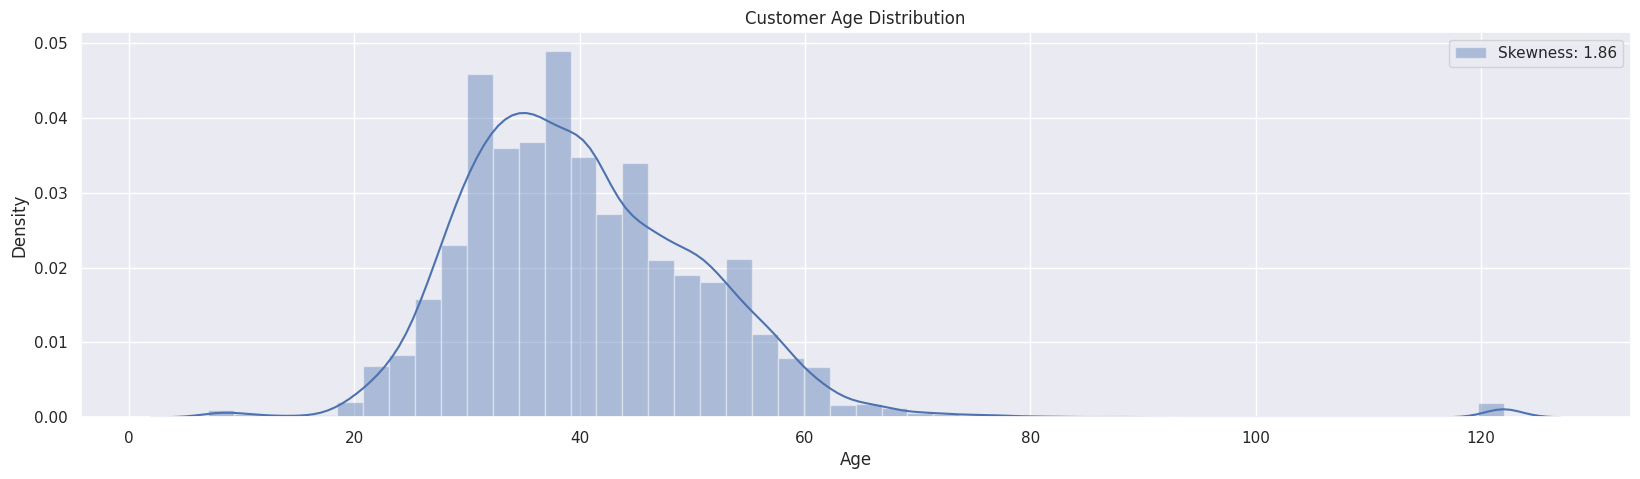

In [64]:
# Understanding the distribution of the column - Age
sns.distplot(loan['Age'], label = 'Skewness: %.2f'%(loan['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

Looking at the age distribution chart of customers, we can see that the majority of customers will be between 20 and 60 years old. In addition, there are customers who are too young, about 7 years old, and some customers who are too old, about 120 years old. My assumption is that it may be due to a problem of incorrect data entry so we can consider it an outlier that needs to be eliminated.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




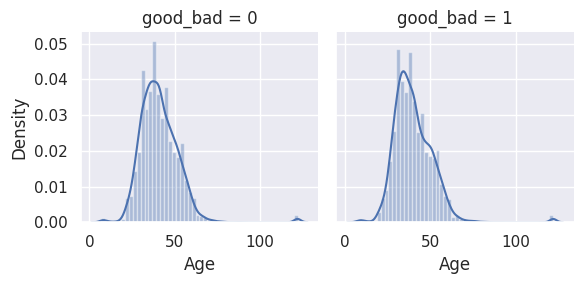

In [65]:
# Explore Age vs Good_Bad
g = sns.FacetGrid(loan, col='good_bad')
g = g.map(sns.distplot, "Age")

Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

We notice that age distributions are not the same in the bad loan and good loan subpopulations. We also see that customers between 50-70 have less bad loan.

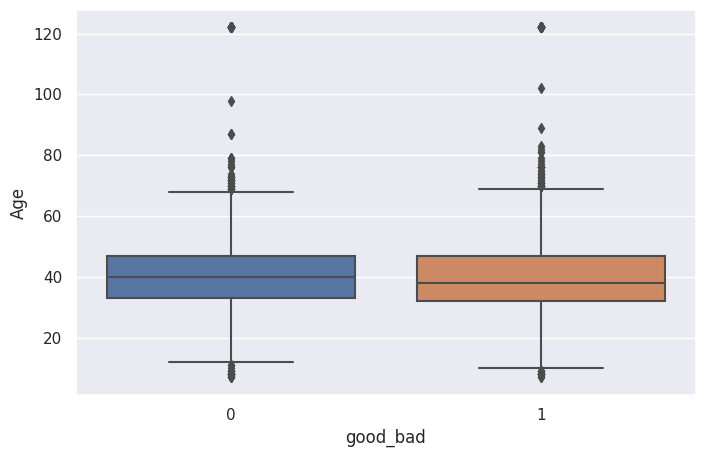

In [66]:
f, ax = plt.subplots(figsize=(8,5))

sns.boxplot(x = loan["good_bad"], y = loan['Age'])
plt.show()

#### Handle outlier values of "Age"

We see that both bad debt and good debt have outliers. We will decide to find out customers whose age is above 90 years old and under 18 years old in both good and bad loan. Because customers who are allowed to open a loan account will only be 18 years or older.There can be those outliers due to various reasons such as incorrect filling. So we will replace customers under 18 years old with 18 years old and over 90 years old with 90 years old

In [67]:
# get oulier age < 18 and replace = 18
outlier_age_min = loan[loan['Age'] < 18].index
loan['Age'][outlier_age_min] = 18

# get oulier age > 90 and replace = 90
outlier_age_max = loan[loan['Age'] > 80].index
loan['Age'][outlier_age_max] = 80

<ipython-input-67-415f60b0c3a9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-415f60b0c3a9>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Boxplot chart of age after outlier peocessing

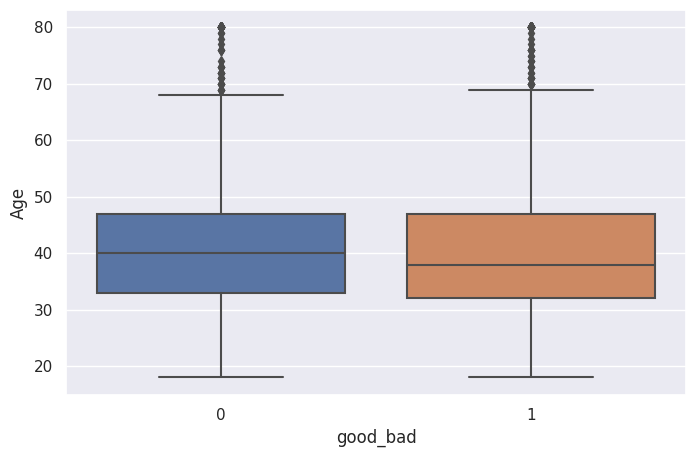

In [68]:
f, ax = plt.subplots(figsize=(8,5))

sns.boxplot(x = loan["good_bad"], y = loan['Age'])
plt.show()

### 10. Distribution of CRLIMIT

<ipython-input-69-f002531b7856>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




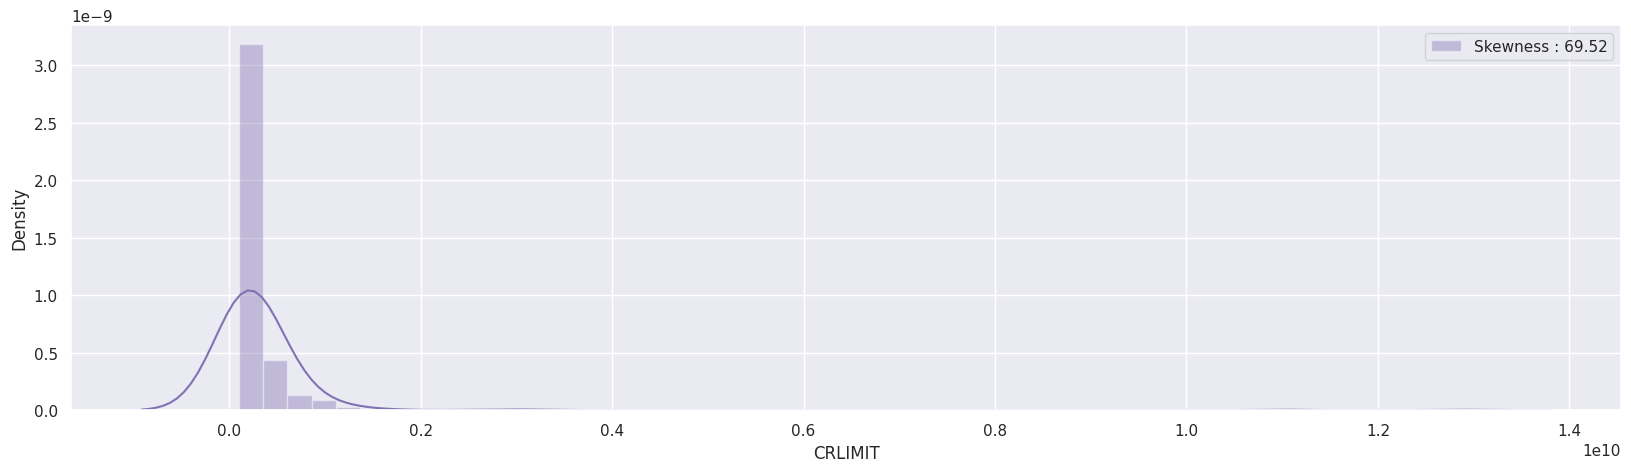

In [69]:
#Explore CRLIMIT distribution 
g = sns.distplot(loan[loan['CRLIMIT']>100000000]['CRLIMIT'], color="m", label="Skewness : %.2f"%(loan["CRLIMIT"].skew()))
g = g.legend(loc="best")

Customers will mainly get loans from about 100 million MMK to 800 million MMK. And there are very few borrowers over 2 billion.

##  Loan duration

<ipython-input-70-5ed38e38968e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




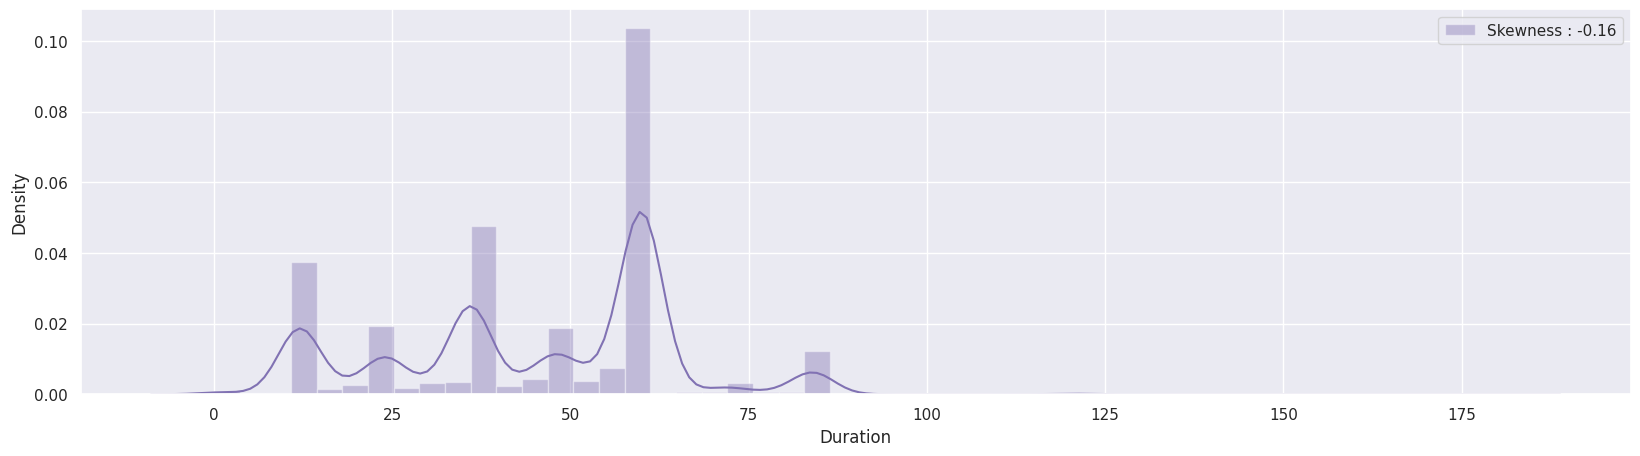

In [70]:
#Explore Duration distribution 
g = sns.distplot(loan['Duration'], color="m", label="Skewness : %.2f"%(loan["Duration"].skew()))
g = g.legend(loc="best")

Most customers will open a loan with a term of 12 to 60 months. Customers with loans for 60 months make up the majority of the dataset. Very few customers have loans with a term of more than 60 months.

## State

Names of the states of Myanmar

1/ Kachin, 2/ Kayah, 3/ Kayin, 4/ Chin, 5/ Sagaing, 6/ Tanintharyi, 7/ Bago, 8/ Magway, 9/ Mandalay, 10/ Mon, 11/ Rakhine, 12/ Yangon, 13/ Shan and 14/ Ayeyarwaddy

Text(0.5, 0, 'state')

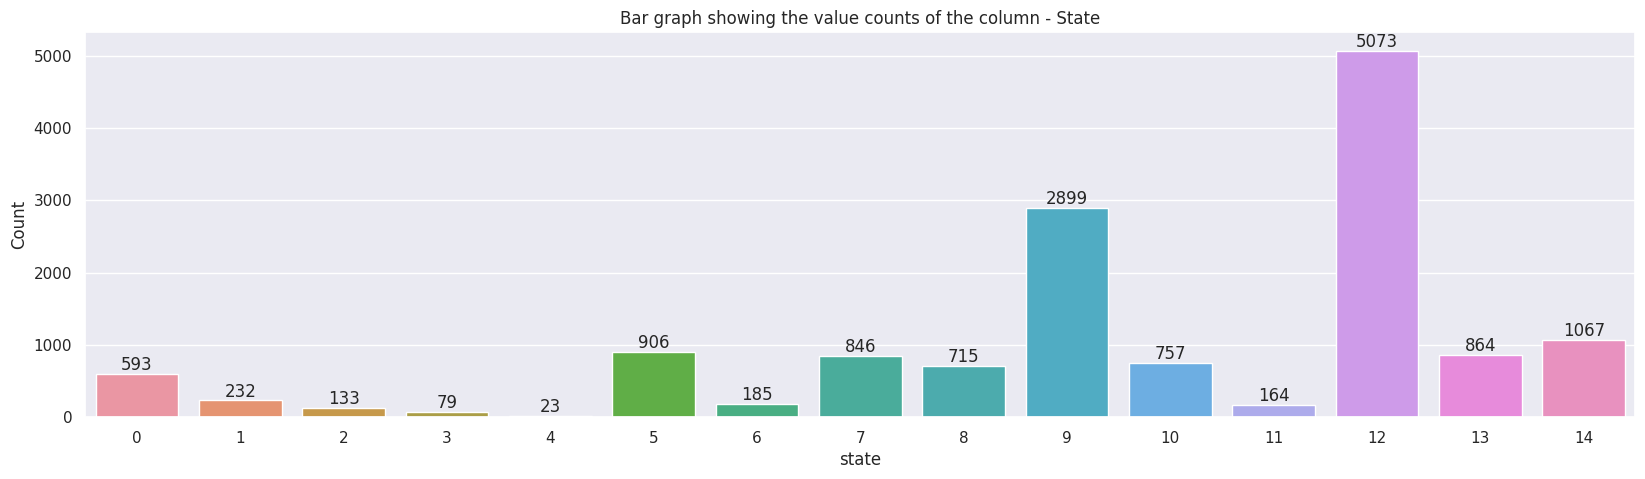

In [71]:
#Value counts of the columns - State
purpose_count = loan['state'].value_counts(dropna=False)
sns.set(rc = {'figure.figsize': (20, 5)})
ax= sns.barplot(x=purpose_count.index, y=purpose_count.values)
ax.bar_label(ax.containers[0])
plt.title('Bar graph showing the value counts of the column - State')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('state', fontsize = 12)


Mainly customers will live in Yangon, the capital of Myanmar with 5073 customers. This is also evident because the main headquarters of AYA bank is located in the capital city of Yangon, Myanmar. Next is the second largest city in Myanmar is Mandalay. The number of customers in this city is also very large, about 2899 customers.

In [72]:
visualaize_percentage('state')

<ipython-input-54-492bd057162a>:4: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



<Figure size 2500x2500 with 0 Axes>

A higher percentage of bad debt customers than good debt customers are located in the Kayah, Chin, Mandalay, and Rakhine regions. But this number is not high, it is only about 4%.

#Save Dataset

Save two datasets that have been classified as customers with bad debt and customers with good debt

In [73]:
bad_loans.to_csv("bad_loans.csv",index=False)
good_loans.to_csv("good_loans.csv",index=False)

loan.to_csv("Data/loan_fn.csv",index=False)

In [74]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14536 entries, 0 to 23704
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CUSTOMERID          14536 non-null  float64
 1   CUSTOMER_TYPE       14536 non-null  object 
 2   CATEGORYID          14536 non-null  float64
 3   CATNAME             14536 non-null  object 
 4   CRD_PURPOSE         14536 non-null  object 
 5   CRD_CLASSIFICATION  14536 non-null  object 
 6   CRLIMIT             14536 non-null  float64
 7   BRNAME              14536 non-null  object 
 8   DEALER_NAME         14536 non-null  object 
 9   PRINTAMT            14536 non-null  float64
 10  Down_payment%       14536 non-null  float64
 11  ntransaction_l12m   14536 non-null  float64
 12  MARTIAL_STATUS      14536 non-null  object 
 13  nopen_account       14536 non-null  float64
 14  nclose_account      14536 non-null  float64
 15  state               14536 non-null  int64  
 16  Age 